**Import Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

**Loading Data**

In [ ]:
dataset_path='/content/drive/MyDrive/Analysis of Super Store - DA.csv'
df=pd.read_csv(dataset_path)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Statistical Analysis**

In [ ]:
df.shape

(9994, 13)

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Descriptive anlaysis & Visualization**

In [ ]:
categorical=[]
discrete=[]
for col in df.columns:
  if df[col].dtype=='object':
    categorical.append(col)
  elif df[col].dtype=='int64' or df[col].dtype=='float64':
    discrete.append(col)
print("categorical columns are ",categorical)
print("discrete columns are ",discrete)

categorical columns are  ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
discrete columns are  ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


In [ ]:
for i in categorical:
  print(i,df[i].unique(),len(df[i].unique()))

Ship Mode ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 4
Segment ['Consumer' 'Corporate' 'Home Office'] 3
Country ['United States'] 1
City ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 '

<Axes: xlabel='Region'>

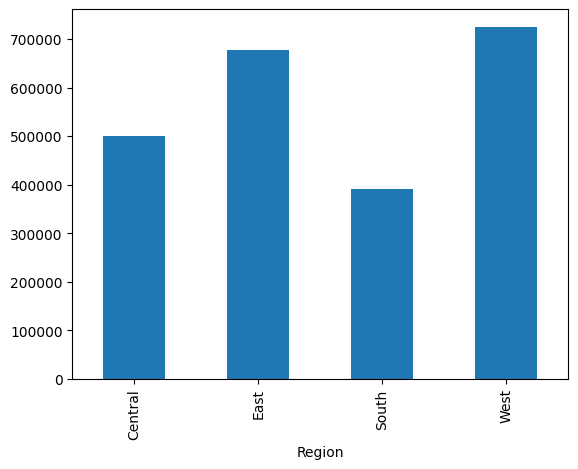

In [ ]:
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: xlabel='Region'>

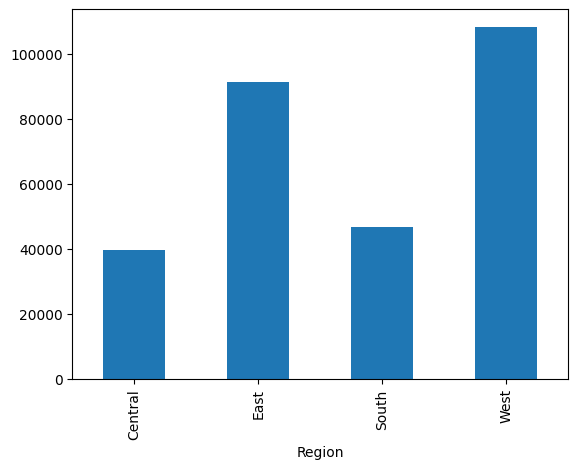

In [ ]:
df.groupby("Region")["Profit"].sum().plot.bar()

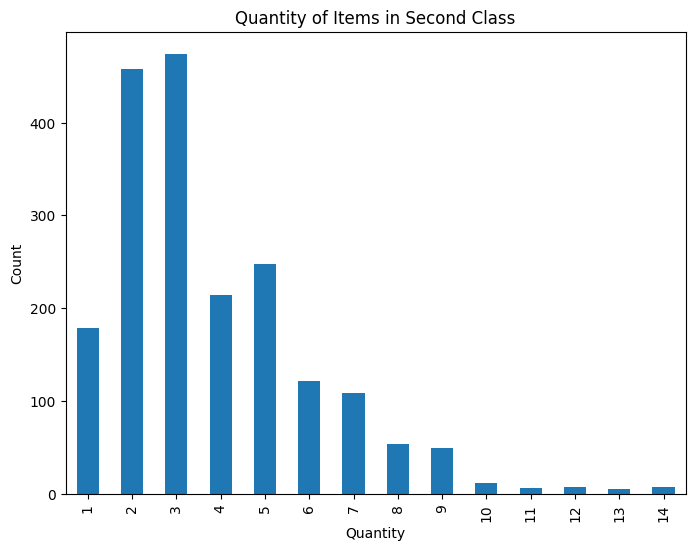

In [ ]:
second_class_df = df[df["Ship Mode"] == "Second Class"]
quantity_counts = second_class_df.groupby("Quantity").size()
quantity_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title("Quantity of Items in Second Class")
plt.show()

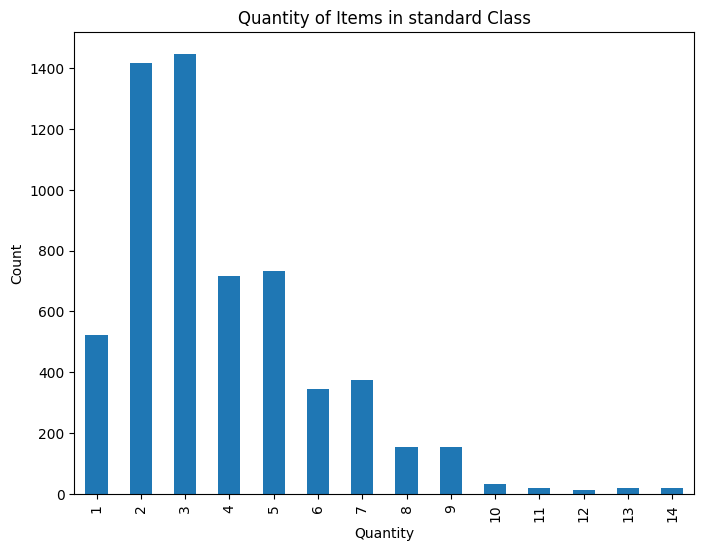

In [ ]:
standard_class_df = df[df["Ship Mode"] == "Standard Class"]
quantity_counts1 = standard_class_df.groupby("Quantity").size()
quantity_counts1.plot(kind='bar', figsize=(8, 6))
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title("Quantity of Items in standard Class")
plt.show()

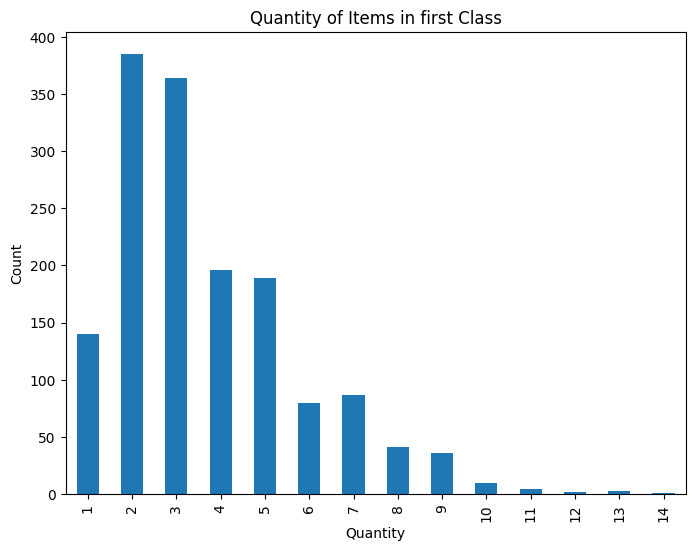

In [ ]:
first_class_df = df[df["Ship Mode"] == "First Class"]
quantity_counts2 = first_class_df.groupby("Quantity").size()
quantity_counts2.plot(kind='bar', figsize=(8, 6))
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title("Quantity of Items in first Class")
plt.show()

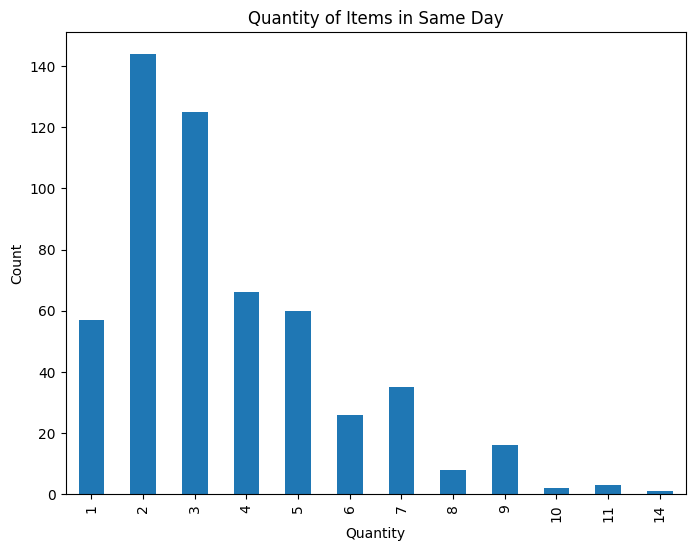

In [ ]:
Same_Day_class_df = df[df["Ship Mode"] == "Same Day"]
quantity_counts3 = Same_Day_class_df.groupby("Quantity").size()
quantity_counts3.plot(kind='bar', figsize=(8, 6))
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title("Quantity of Items in Same Day")
plt.show()

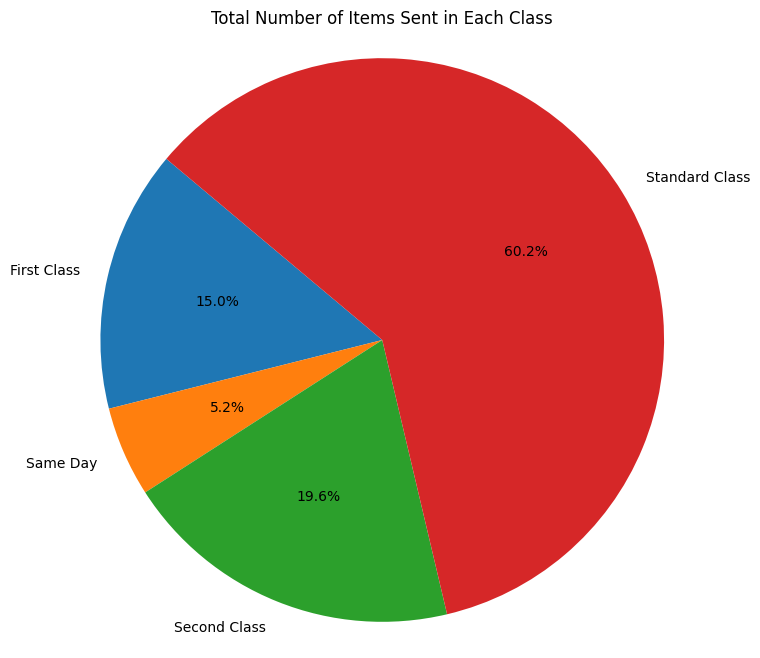

In [ ]:
items_sent_by_class = df.groupby("Ship Mode")["Quantity"].sum()
plt.figure(figsize=(8, 8))
plt.pie(items_sent_by_class, labels=items_sent_by_class.index, autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Total Number of Items Sent in Each Class")
plt.show()

In [ ]:
subcategories_by_category = df.groupby("Category")["Sub-Category"].unique()
for category, subcategories in subcategories_by_category.items():
    num_subcategories = len(subcategories)
    subcategory_names = ", ".join(subcategories)
    print(f"Category: {category}, Number of Subcategories: {num_subcategories}")
    print(f"Subcategories: {subcategory_names}\n")

Category: Furniture, Number of Subcategories: 4
Subcategories: Bookcases, Chairs, Tables, Furnishings

Category: Office Supplies, Number of Subcategories: 9
Subcategories: Labels, Storage, Art, Binders, Appliances, Paper, Envelopes, Fasteners, Supplies

Category: Technology, Number of Subcategories: 4
Subcategories: Phones, Accessories, Machines, Copiers



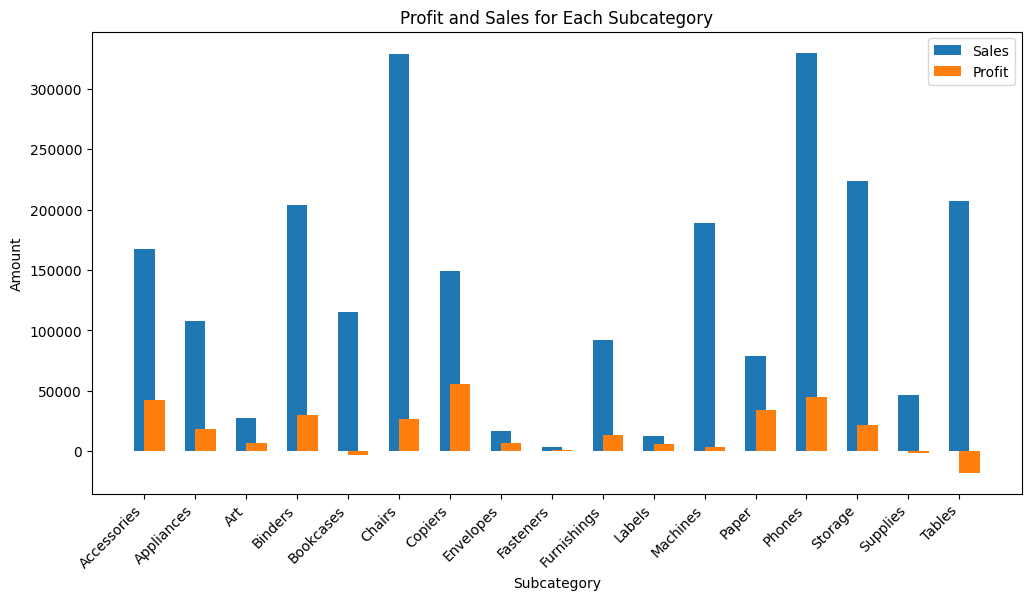

In [ ]:
subcategories_data = df.groupby("Sub-Category").agg({
    "Profit": "sum",
    "Sales": "sum"
}).reset_index()
plt.figure(figsize=(12, 6))
plt.bar(subcategories_data["Sub-Category"], subcategories_data["Sales"], label="Sales", width=0.4)
plt.bar(subcategories_data["Sub-Category"], subcategories_data["Profit"], label="Profit", width=0.4, align="edge")
plt.xlabel("Subcategory")
plt.ylabel("Amount")
plt.title("Profit and Sales for Each Subcategory")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

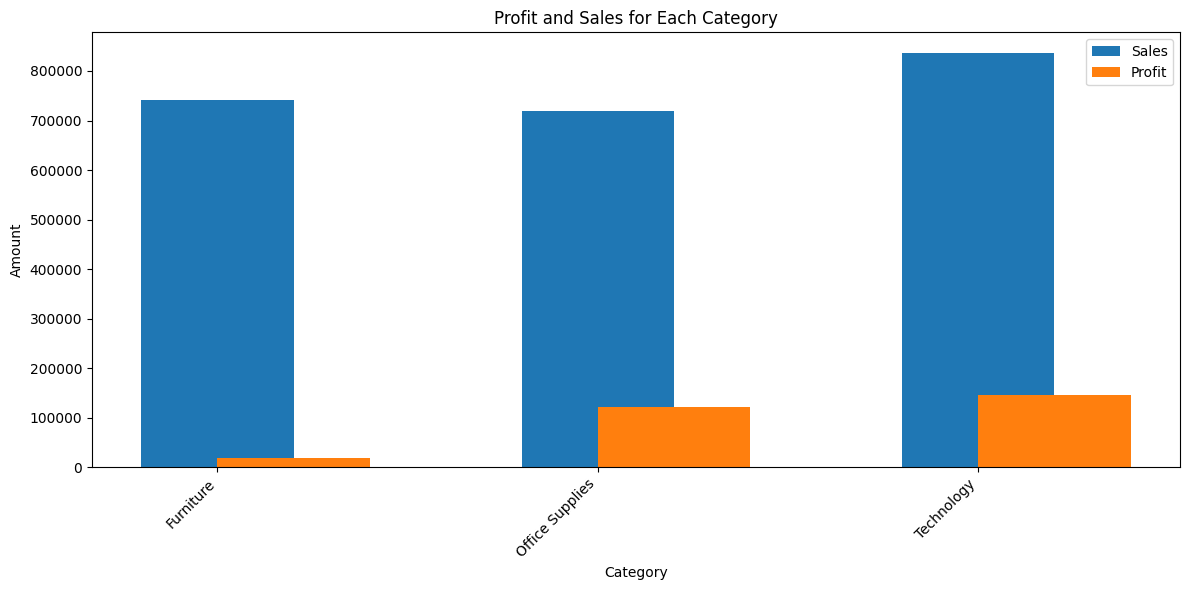

In [ ]:

categories_data = df.groupby("Category").agg({
    "Profit": "sum",
    "Sales": "sum"
}).reset_index()

plt.figure(figsize=(12, 6))

plt.bar(categories_data["Category"], categories_data["Sales"], label="Sales", width=0.4)

plt.bar(categories_data["Category"], categories_data["Profit"], label="Profit", width=0.4, align="edge")

plt.xlabel("Category")
plt.ylabel("Amount")
plt.title("Profit and Sales for Each Category")
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

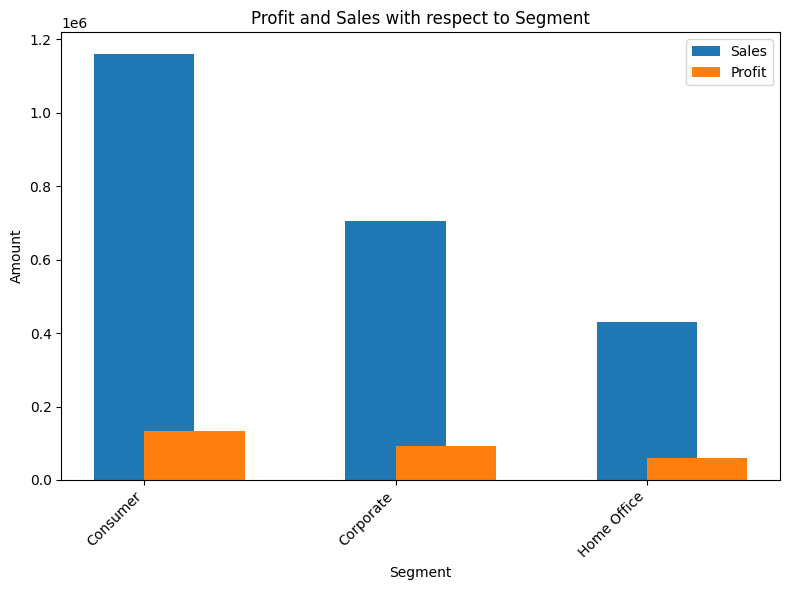

In [ ]:

segment_data = df.groupby("Segment").agg({
    "Profit": "sum",
    "Sales": "sum"
}).reset_index()

plt.figure(figsize=(8, 6))

plt.bar(segment_data["Segment"], segment_data["Sales"], label="Sales", width=0.4)

plt.bar(segment_data["Segment"], segment_data["Profit"], label="Profit", width=0.4, align="edge")


plt.xlabel("Segment")
plt.ylabel("Amount")
plt.title("Profit and Sales with respect to Segment")
plt.xticks(rotation=45, ha='right')
plt.legend()


plt.tight_layout()
plt.show()

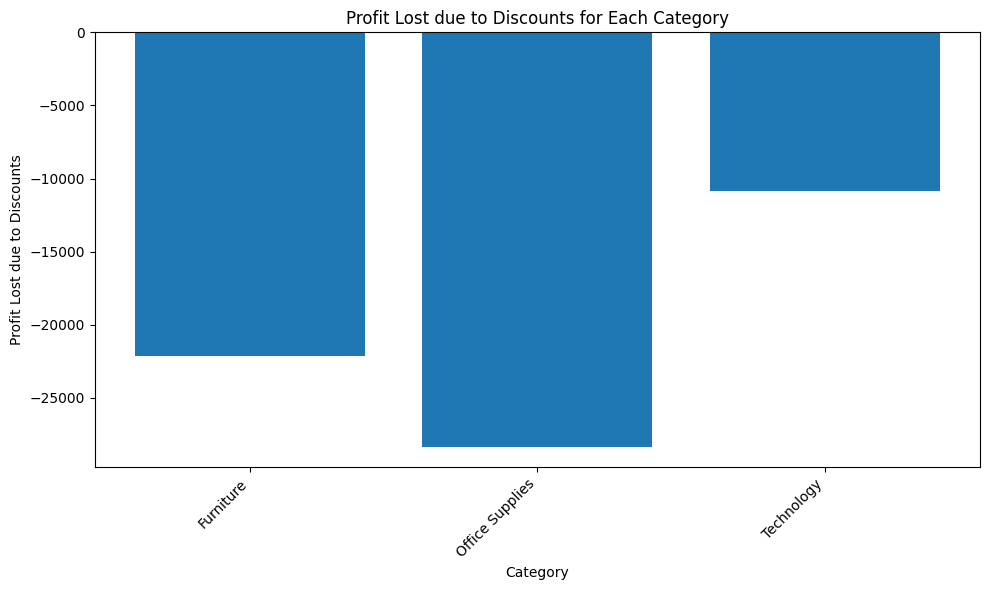

In [ ]:

category_profit_without_discount = df.groupby("Category")["Profit"].sum()

category_profit_with_discount = df.groupby("Category").apply(lambda x: (x["Profit"] * (1 - x["Discount"])).sum())

profit_lost_due_to_discount = category_profit_without_discount - category_profit_with_discount

plt.figure(figsize=(10, 6))
plt.bar(profit_lost_due_to_discount.index, profit_lost_due_to_discount)
plt.xlabel("Category")
plt.ylabel("Profit Lost due to Discounts")
plt.title("Profit Lost due to Discounts for Each Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

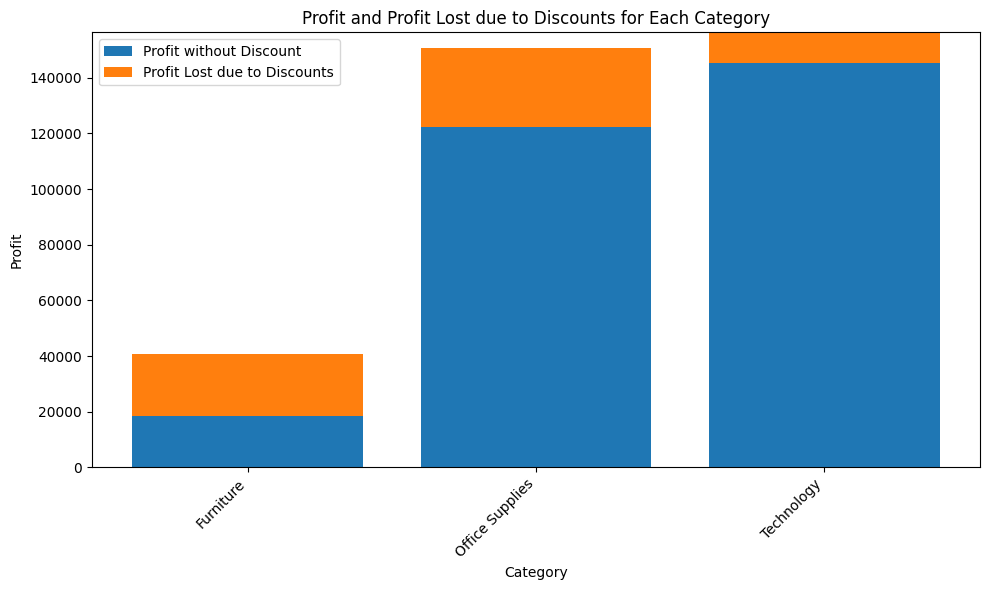

In [ ]:

category_profit_without_discount = df.groupby("Category")["Profit"].sum()

category_profit_with_discount = df.groupby("Category").apply(lambda x: (x["Profit"] * (1 - x["Discount"])).sum())

profit_lost_due_to_discount = category_profit_without_discount - category_profit_with_discount

plt.figure(figsize=(10, 6))

plt.bar(category_profit_without_discount.index, category_profit_without_discount, label="Profit without Discount")

plt.bar(category_profit_with_discount.index, profit_lost_due_to_discount, bottom=category_profit_with_discount,
        label="Profit Lost due to Discounts")

plt.xlabel("Category")
plt.ylabel("Profit")
plt.title("Profit and Profit Lost due to Discounts for Each Category")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()


plt.show()

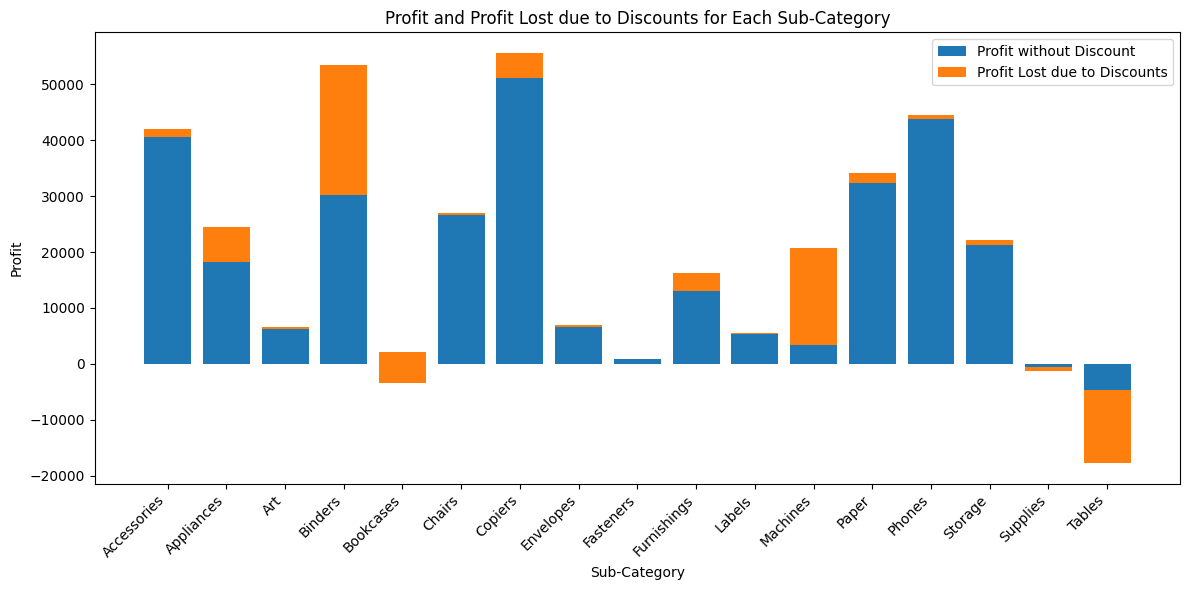

In [ ]:

subcategory_profit_without_discount = df.groupby("Sub-Category")["Profit"].sum()

subcategory_profit_with_discount = df.groupby("Sub-Category").apply(lambda x: (x["Profit"] * (1 - x["Discount"])).sum())

profit_lost_due_to_discount = subcategory_profit_without_discount - subcategory_profit_with_discount

plt.figure(figsize=(12, 6))


plt.bar(subcategory_profit_without_discount.index, subcategory_profit_without_discount, label="Profit without Discount")

plt.bar(profit_lost_due_to_discount.index, profit_lost_due_to_discount, bottom=subcategory_profit_with_discount,
        label="Profit Lost due to Discounts")

plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.title("Profit and Profit Lost due to Discounts for Each Sub-Category")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()
